STAKEHOLDER: Leading Telecommunications Company

PROBLEM: The stakeholder has approached up to find out how they can reduce churn.

BUSINESS UNDERSTADING: Build a classifier to predict whether a customer will ("soon") stop doing business with our stakeholder. Optimize to reduce amount of money lost due to churn. This is a binary classification problem.

## EDA

Import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, plot_roc_curve, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as Pipeline
from statsmodels.api import qqplot
from scipy import stats
from sklearn.metrics import accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier


Load and explore dataset

In [4]:
df = pd.read_csv('data/cell2celltrain.csv')
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [6]:
df.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


## Cleaning

Dropped null values and eliminated unuseful columns

In [7]:
df.dropna(how='any', inplace=True)
df.drop(['CustomerID', 'Homeownership', 'NotNewCellphoneUser', 'HandsetPrice', 
         'PrizmCode', 'Occupation', 'MaritalStatus'], axis=1, inplace=True)

Isolated zip code from ServiceArea data and refined CreditRating

In [8]:
df['ZipCode'] = df['ServiceArea'].str[-3:]
df['CreditRating'] = (df['CreditRating'].str[0]).astype(int)

Converted categorical strings to numeric data

In [9]:
df.replace(to_replace='Yes', value=1, inplace=True)
df.replace(to_replace='No', value=0, inplace=True)

In [10]:
df

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,ZipCode
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,1,0,0,0,4,0,0,1,1,503
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,0,1,0,5,0,0,0,4,412
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,0,1,0,6,0,0,0,3,414
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,0,1,0,6,0,0,0,4,412
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,0,0,0,0,9,0,1,0,1,918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51035,0,0.00,76.0,30.0,0.00,0.0,0.0,0.0,0.0,5.7,...,0,0,0,0,4,0,0,0,2,619
51037,0,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,...,0,0,0,0,3,0,0,0,3,760
51040,0,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,...,0,0,0,0,7,0,0,0,1,818
51041,1,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,4.0,...,0,0,0,0,2,0,0,0,5,562


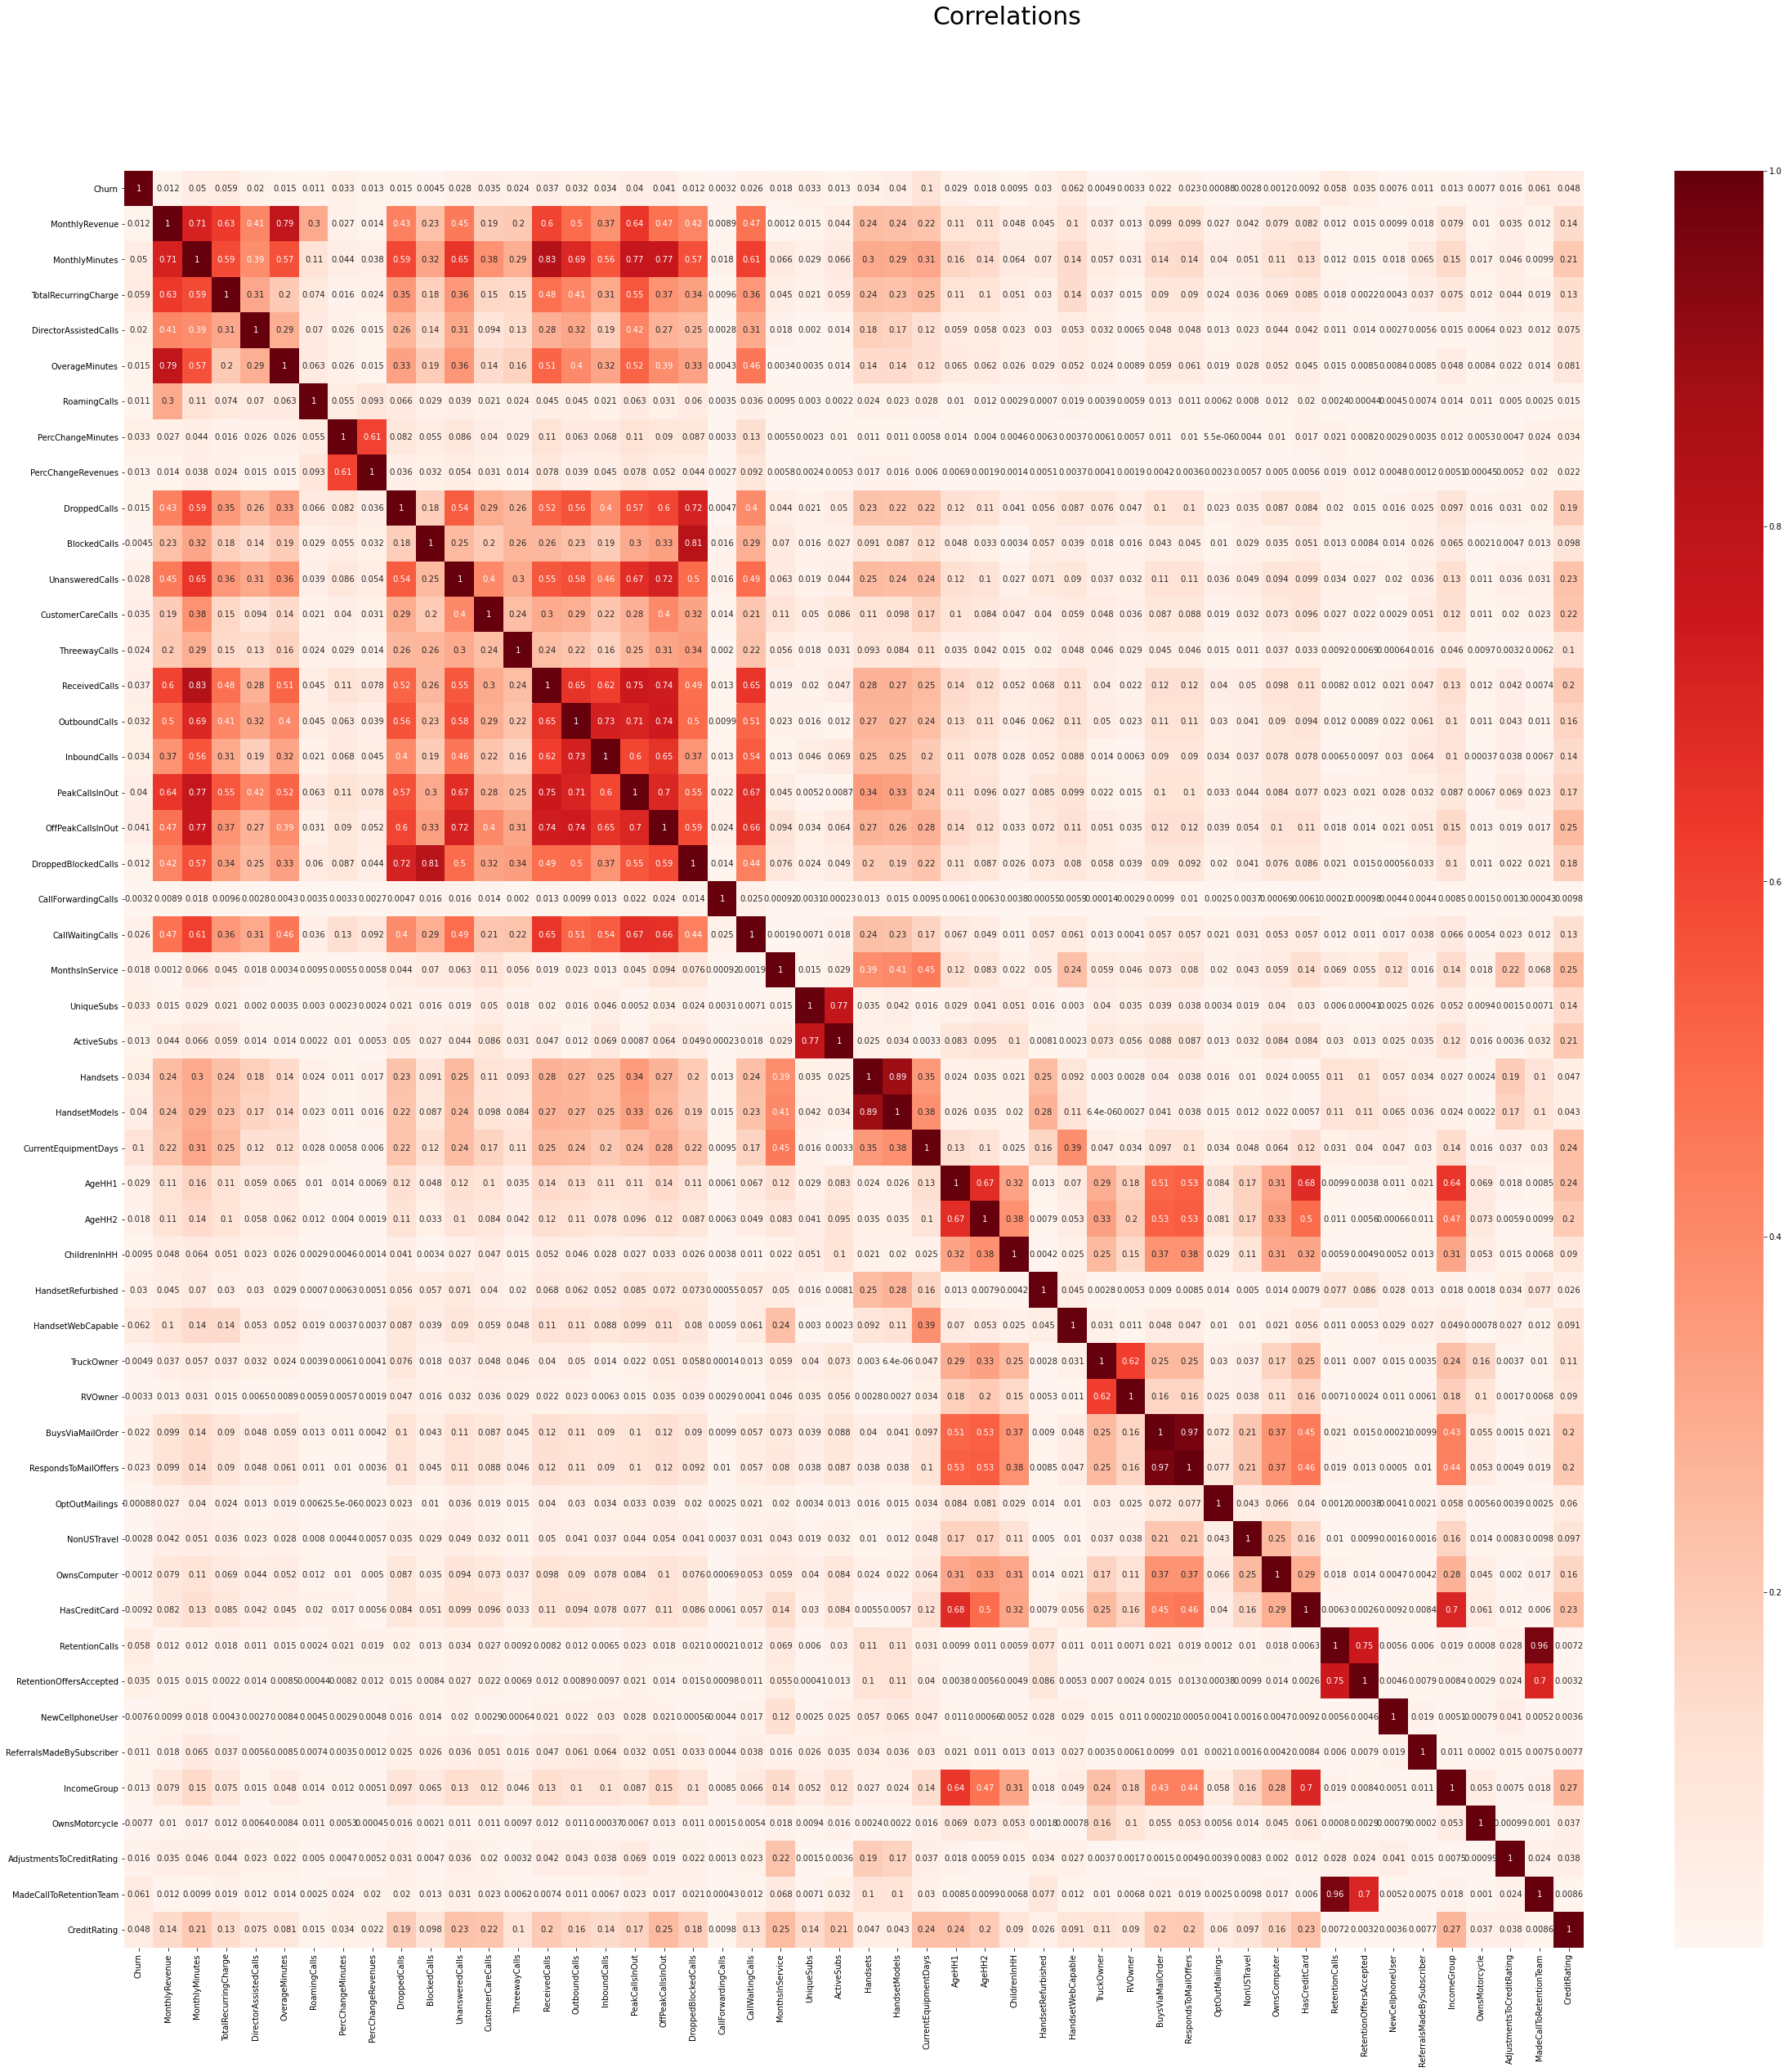

In [11]:
corr = df.corr().abs()

fig, ax=plt.subplots(figsize=(40,40))
fig.suptitle('Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)

## Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Churn', 'ServiceArea'], axis=1), df['Churn'], random_state=42)

In [13]:
y_test

13288    0
12286    1
5770     1
14722    0
34882    0
        ..
38735    0
32949    0
15594    1
7155     0
23735    1
Name: Churn, Length: 12438, dtype: int64

In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline
from collections import Counter
from matplotlib import pyplot
from numpy import where

## SMOTE

In [16]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train_scaled, y_train)
print(y_train.value_counts())
print(pd.Series(y_train_resampled).value_counts())

0    26687
1    10627
Name: Churn, dtype: int64
1    26687
0    26687
Name: Churn, dtype: int64


In [17]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.dummy import DummyClassifier

In [18]:
dummy_model = DummyClassifier(strategy="most_frequent")

In [19]:
dummy_model.fit(X_train_resampled, y_train_resampled)

DummyClassifier(strategy='most_frequent')

In [20]:
dummy_model.predict(X_train_resampled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score

In [22]:
dummy_cv_results = cross_val_score(dummy_model, X_train_resampled, y_train_resampled, cv=5)
dummy_cv_results

array([0.49995316, 0.49995316, 0.49995316, 0.49995316, 0.5       ])

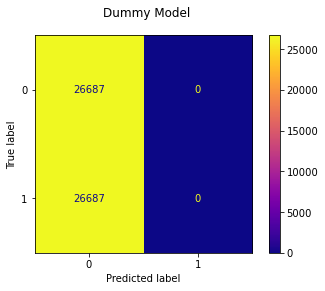

In [23]:
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, X_train_resampled, y_train_resampled, ax=ax, cmap="plasma");

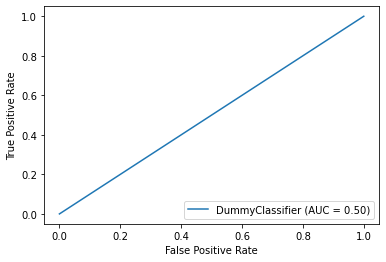

In [24]:
plot_roc_curve(dummy_model, X_train_resampled, y_train_resampled);

In [25]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

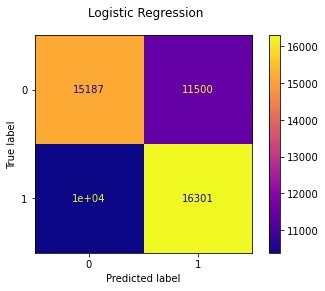

In [26]:
CM = confusion_matrix(y_train_resampled, logreg.predict(X_train_resampled))

fig, ax = plt.subplots()

fig.suptitle("Logistic Regression")

plot_confusion_matrix(logreg, X_train_resampled, y_train_resampled, ax=ax, cmap="plasma");

In [27]:
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

In [28]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.5899501630007119

In [29]:
precision = TP /(TP + FP)
precision

0.5863458148987446

In [30]:
recall = TP / (TP + FN )
recall

0.6108217484168321

In [31]:
f1score = 2 *((precision * recall)/ (precision + recall))
f1score

0.5983335780355307

In [32]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [33]:
y_hat = logreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_hat)

0.5659867549378329

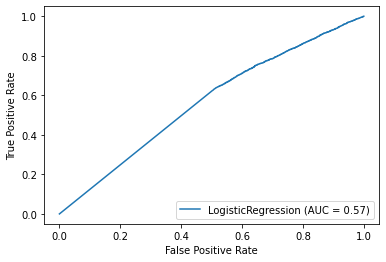

In [34]:
plot_roc_curve(logreg, X_test, y_test);

top_churn_metrics = ['TotalRecurringCharge', 'MonthlyMinutes', 'CurrentEquipmentDays', 'HandsetWebCapable']

sns.pairplot(df[top_churn_metrics])

In [35]:
logreg_2 = LogisticRegression(random_state=42, penalty='l2',solver='liblinear', max_iter=1000)
logreg_2.fit(X_train_resampled, y_train_resampled) 

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

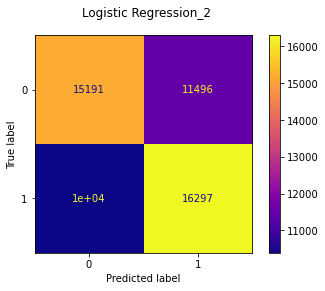

In [36]:
CM_2 = confusion_matrix(y_train_resampled, logreg_2.predict(X_train_resampled))

fig, ax = plt.subplots()

fig.suptitle("Logistic Regression_2")

plot_confusion_matrix(logreg_2, X_train_resampled, y_train_resampled, ax=ax, cmap="plasma");

In [37]:
# Function that takes in the classifier as input and returns a pipeline.
def pipe_maker(classifier):
    
    pipe = Pipeline([('scl', StandardScaler()),
                    ('clf', classifier(random_state=42))])
    return pipe

In [38]:
# Function that takes in a Pipeline & Parameters then returns a gridsearch object with selected parameters.
def gridsearch_maker(pipeline, params):

    return GridSearchCV(estimator=pipeline,
                        param_grid=params,
                        scoring='balanced_accuracy',
                        cv=10,
                        n_jobs=-1)

In [39]:
# Function that takes in a gridsearch, interates over the available hyperparameters and returns the parameters necessary
# to achieve the optimal recall score.
def best_recall(gridsearch):

    # Create best_recall object.
    best_recall = 0.0
    
    # Fit gridsearch to regularized data set.
    gridsearch.fit(X_train_resampled, y_train_resampled)
    
    # Print best parameters.
    print('Best paramaters are: %s' % gridsearch.best_params_)
    
    # Print best train Recall score.
    print('Best training recall is: %.3f' % gridsearch.best_score_)
    
    # Prediction on scaled test data.
    y_pred = gridsearch.predict(X_test_scaled)
    
    # Print test data recall with best params.
    print('Test set recall score with best parameters: %.3f ' % recall_score(y_test, y_pred))
    
    # Print confusion matrix and classification report.
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('Recall score: ', recall_score(y_test, y_pred))
    
    # Plot confusion matrix.
    plot_confusion_matrix(gridsearch, X_test_scaled, y_test,cmap="plasma")
    plt.show()

Best paramaters are: {'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training recall is: 0.588
Test set recall score with best parameters: 0.603 
[[5044 3776]
 [1435 2183]]
              precision    recall  f1-score   support

           0       0.78      0.57      0.66      8820
           1       0.37      0.60      0.46      3618

    accuracy                           0.58     12438
   macro avg       0.57      0.59      0.56     12438
weighted avg       0.66      0.58      0.60     12438

Recall score:  0.603372028745163


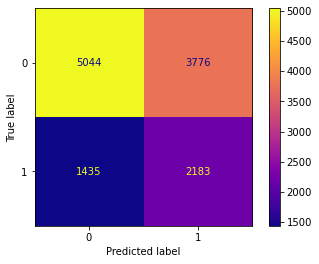

In [40]:
pipe_lr = pipe_maker(LogisticRegression)

gs_lr = gridsearch_maker(pipe_lr, {'clf__penalty': ['l1', 'l2'], 'clf__solver': ['liblinear', 'saga']})

best_recall(gs_lr)

In [41]:
rf_range = [1,5,10]

Best paramaters are: {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5}
Best training recall is: 0.738
Test set recall score with best parameters: 0.386 
[[6870 1950]
 [2221 1397]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      8820
           1       0.42      0.39      0.40      3618

    accuracy                           0.66     12438
   macro avg       0.59      0.58      0.58     12438
weighted avg       0.66      0.66      0.66     12438

Recall score:  0.3861249309010503


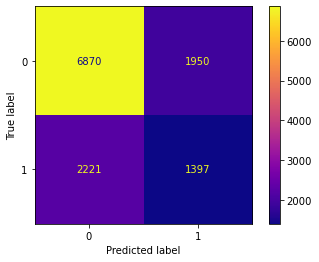

In [42]:
# Lets try RandomForestClassifier!
pipe_rf = pipe_maker(RandomForestClassifier)

# Creating paramaters
grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': rf_range,
                   'clf__max_depth': rf_range,
                   'clf__min_samples_split': rf_range}]

# Creating grid search object
gs_rf = gridsearch_maker(pipe_rf, grid_params_rf)

# Finding best parameters for recall
best_recall(gs_rf)

Best paramaters are: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 1}
Best training recall is: 0.808
Test set recall score with best parameters: 0.199 
[[7951  869]
 [2897  721]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.81      8820
           1       0.45      0.20      0.28      3618

    accuracy                           0.70     12438
   macro avg       0.59      0.55      0.54     12438
weighted avg       0.65      0.70      0.65     12438

Recall score:  0.19928137092316198


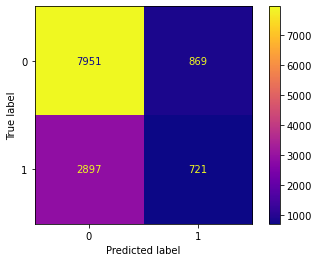

In [43]:
# We are seeing some improvement over Logistic Regression so lets try again with different parameters.
pipe_rf = pipe_maker(RandomForestClassifier)

# Creating paramaters
grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': rf_range,}]

# Creating grid search object
gs_rf = gridsearch_maker(pipe_rf, grid_params_rf)

# Finding best parameters for recall
best_recall(gs_rf)

In [44]:
# Not much improvement there so lets try changing the parameter range.
rf_range_2 = [1,10,100]

Best paramaters are: {'clf__criterion': 'entropy', 'clf__min_samples_split': 10}
Best training recall is: 0.800
Test set recall score with best parameters: 0.205 
[[7938  882]
 [2878  740]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.81      8820
           1       0.46      0.20      0.28      3618

    accuracy                           0.70     12438
   macro avg       0.60      0.55      0.55     12438
weighted avg       0.65      0.70      0.66     12438

Recall score:  0.2045328911000553


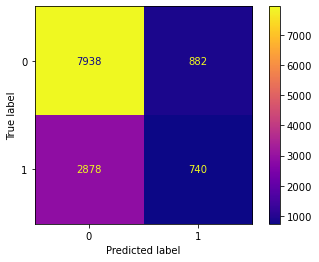

In [45]:
# Lets try again with the revised parameter range.
pipe_rf = pipe_maker(RandomForestClassifier)

# Creating paramaters
grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_split': rf_range_2}]

# Creating grid search object
gs_rf = gridsearch_maker(pipe_rf, grid_params_rf)

# Finding best parameters for recall
best_recall(gs_rf)

Best paramaters are: {'clf__criterion': 'entropy', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10}
Best training recall is: 0.800
Test set recall score with best parameters: 0.205 
[[7938  882]
 [2878  740]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.81      8820
           1       0.46      0.20      0.28      3618

    accuracy                           0.70     12438
   macro avg       0.60      0.55      0.55     12438
weighted avg       0.65      0.70      0.66     12438

Recall score:  0.2045328911000553


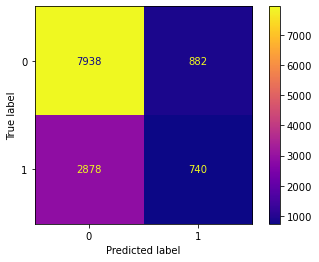

In [46]:
# One more time with an additional parameter and the revised parameter range.
pipe_rf = pipe_maker(RandomForestClassifier)

# Creating paramaters
grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': rf_range_2,
                   'clf__min_samples_split': rf_range_2}]

# Creating grid search object
gs_rf = gridsearch_maker(pipe_rf, grid_params_rf)

# Finding best parameters for recall
best_recall(gs_rf)

In [49]:
svm_range = [1,3,5,10] # Took to long to run.

# fitting Support Vector Machine pipeline
pipe_svm = pipe_maker(svm.SVC)

# setting grid search parameters
grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
                    'clf__C': svm_range}]

# creating grid search object
gs_svm = gridsearch_maker(pipe_svm, grid_params_svm)

# finding best parameters for recall
best_recall(gs_svm)

Best paramaters are: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5}
Best training recall is: 0.864
Test set recall score with best parameters: 0.167 
[[8018  802]
 [3014  604]]
              precision    recall  f1-score   support

           0       0.73      0.91      0.81      8820
           1       0.43      0.17      0.24      3618

    accuracy                           0.69     12438
   macro avg       0.58      0.54      0.52     12438
weighted avg       0.64      0.69      0.64     12438

Recall score:  0.16694306246545051


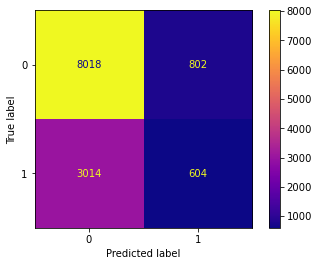

In [48]:
# fitting Extra Trees pipeline
pipe_et = pipe_maker(ExtraTreesClassifier)

# setting grid search parameters
grid_params_et = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': rf_range,
                   'clf__min_samples_split': rf_range}]

# creating grid search object
gs_et = gridsearch_maker(pipe_et, grid_params_et)

# finding best parameters for recall
best_recall(gs_et)

# Classifiers Reference 

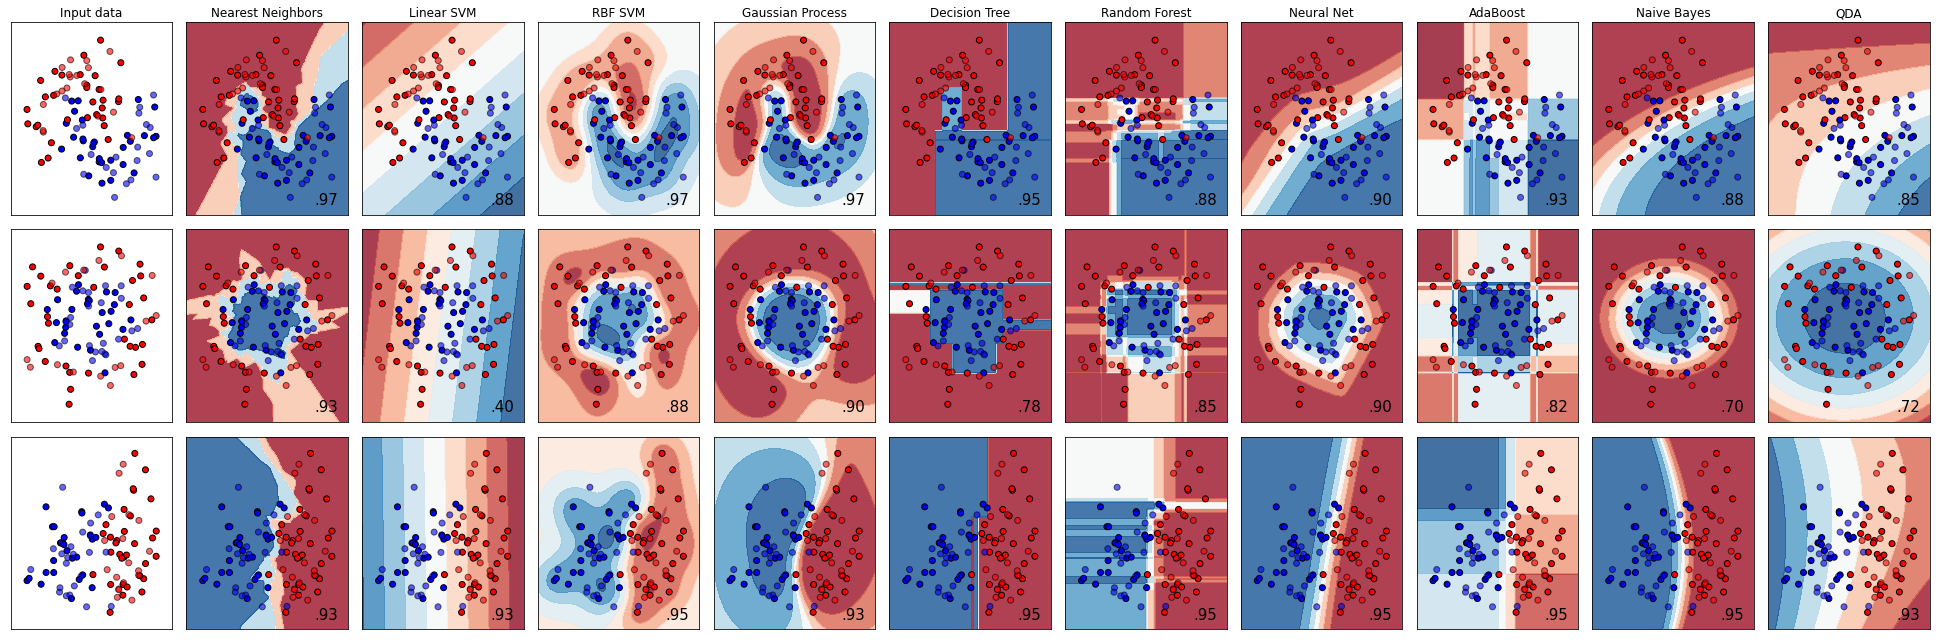

In [50]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()